# Image Preprocessing

Importing necessary libraries

In [ ]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import logging
import pathlib
import matplotlib.pyplot as plt

Seperating the dataset into train and test dataset

In [21]:
#for logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

#path of the training data sets
train_dir = ".\\Classification of Arrhythmia by Using Deep Learning with 2-D ECG Spectral Image Representation\\data\\train"
train_dir = pathlib.Path(train_dir)
test_dir = ".\\Classification of Arrhythmia by Using Deep Learning with 2-D ECG Spectral Image Representation\\data\\test"
test_dir = pathlib.Path(test_dir)


#defining parameters for the loaders
batch_size = 32
img_height = 180
img_width = 180

#validation split 80% for training and 20% for validation
x_train = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

x_test = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 15341 files belonging to 6 classes.
Using 12273 files for training.
Found 6825 files belonging to 6 classes.
Using 1365 files for validation.


Printing the collected Datasets

['Left Bundle Branch Block', 'Normal', 'Premature Atrial Contraction', 'Premature Ventricular Contractions', 'Right Bundle Branch Block', 'Ventricular Fibrillation']


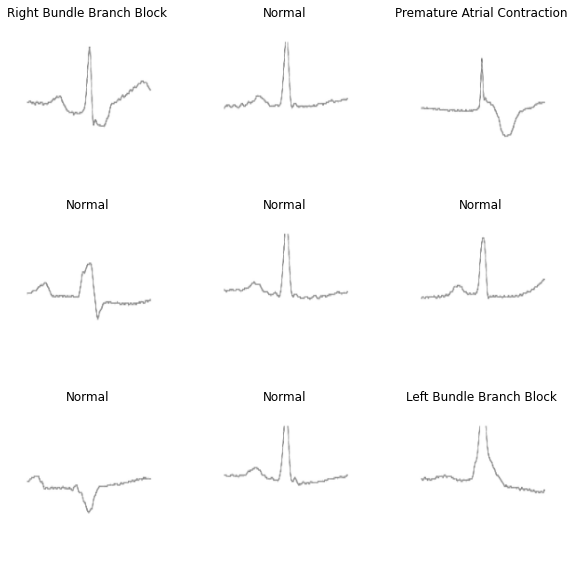

In [26]:
#for the classes present
class_names = x_train.class_names
print(class_names)

#Visualize the data
plt.figure(figsize=(10, 10))
for images, labels in x_train.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [27]:
for image_batch, labels_batch in x_train:
  print(image_batch.shape)
  print(labels_batch.shape)
  break
for image_batch, labels_batch in x_test:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)


# Model Building

Create a Model

In [36]:
model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, (3,3),input_shape=(64,64,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(32),
  tf.keras.layers.Dense(6, activation='softmax')
])

Compile the model 
and configuring the learning process

In [37]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

Train the model

In [39]:
model.fit(
  x_train,
  validation_data=x_test,
  epochs=10
)

Epoch 1/10
384/384 [==============================] - 239s 622ms/step - loss: 0.0613 - accuracy: 0.9820 - val_loss: 0.5115 - val_accuracy: 0.8821
Epoch 2/10
384/384 [==============================] - 230s 599ms/step - loss: 0.0453 - accuracy: 0.9871 - val_loss: 0.4266 - val_accuracy: 0.9201
Epoch 3/10
384/384 [==============================] - 221s 575ms/step - loss: 0.0349 - accuracy: 0.9899 - val_loss: 0.6380 - val_accuracy: 0.8967
Epoch 4/10
384/384 [==============================] - 163s 424ms/step - loss: 0.0360 - accuracy: 0.9894 - val_loss: 0.5792 - val_accuracy: 0.8513
Epoch 5/10
384/384 [==============================] - 168s 438ms/step - loss: 0.0315 - accuracy: 0.9909 - val_loss: 0.7487 - val_accuracy: 0.8894
Epoch 6/10
384/384 [==============================] - 175s 454ms/step - loss: 0.0200 - accuracy: 0.9937 - val_loss: 0.6512 - val_accuracy: 0.9070
Epoch 7/10
384/384 [==============================] - 161s 418ms/step - loss: 0.0120 - accuracy: 0.9967 - val_loss: 0.8278 -

Save the model

In [40]:
model.save('ECG.h5')